In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from inference import remove_bg

In [42]:
table = pd.read_excel(r'013 16 1.xlsx', sheet_name=['1A'])

In [43]:
first = table['1A']

In [44]:
first.columns = ['x', 'y', 'Contagem', 'Imagem']

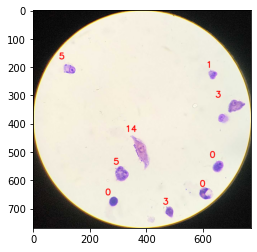

In [64]:
import os
IMAGE_FOLDER = r'GABARITO\013 16 1\1A'

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2

SAVE_PATH = 'visualizacao_preds'
if not os.path.exists(SAVE_PATH):  
  os.makedirs(SAVE_PATH)


imagens = first['Imagem'].unique()
df = first

for img_name in imagens:
  img = cv2.imread(os.path.join(IMAGE_FOLDER, img_name))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = remove_bg(img)
  img = cv2.resize(img, (768, 768))
  

  table = df[df['Imagem'] == img_name]

  for index, row in table.iterrows():
    coords = (int(row['x']), int(row['y']))
    
    cv2.putText(img, str(row['Contagem']), coords, font,fontScale, color, thickness, cv2.LINE_AA)

  plt.imsave(os.path.join('visualizacao_preds',img_name), img)
  
  
  